## Corn Licor

The plot below shows raw time series data of LI-COR ET measurements for two corn nodes:

LI-COR 43

LI-COR 37A

Each node's ET data is plotted over time on the same graph for direct comparison.

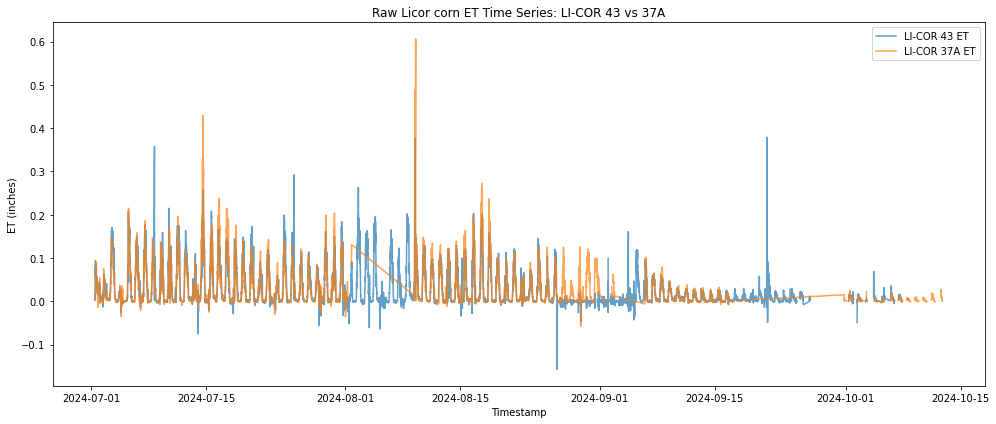

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
licor_file_43 = "Licor corn 43 not clean.csv"
licor_file_37A = "Licor corn 37A not clean.csv"

# Read the data
licor_df_43 = pd.read_csv(licor_file_43)
licor_df_37 = pd.read_csv(licor_file_37A)

# Convert the 'time' column to datetime format
licor_df_43['time'] = pd.to_datetime(licor_df_43['time'])
licor_df_37['time'] = pd.to_datetime(licor_df_37['time'])

# Plot raw time series
plt.figure(figsize=(14, 6))
plt.plot(licor_df_43['time'], licor_df_43['ET.ET.1.3'], label='LI-COR 43 ET', alpha=0.7)
plt.plot(licor_df_37['time'], licor_df_37['ET.ET.1.3'], label='LI-COR 37A ET', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('ET (inches)')
plt.title('Raw Licor corn ET Time Series: LI-COR 43 vs 37A')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


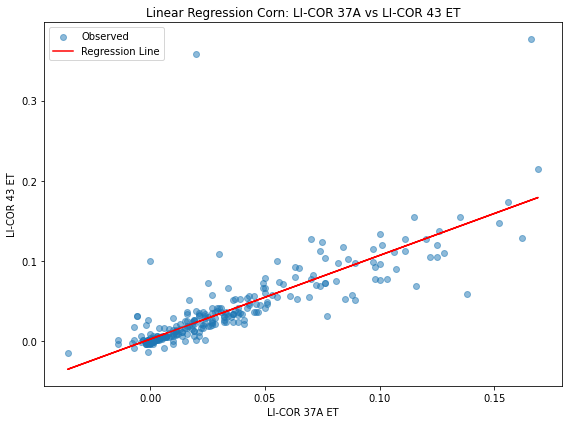

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the data
licor_df_43 = pd.read_csv("Licor corn 43 not clean.csv")
licor_df_37 = pd.read_csv("Licor corn 37A not clean.csv")

# Convert 'time' to datetime
licor_df_43['time'] = pd.to_datetime(licor_df_43['time'])
licor_df_37['time'] = pd.to_datetime(licor_df_37['time'])

# Merge the datasets on timestamp
merged_df = pd.merge(licor_df_43, licor_df_37, on='time', suffixes=('_43', '_37A'))

# Drop rows with NaN values
merged_df_clean = merged_df.dropna(subset=['ET.ET.1.3_37A', 'ET.ET.1.3_43'])

# Prepare regression variables
X = merged_df_clean[['ET.ET.1.3_37A']].values
y = merged_df_clean['ET.ET.1.3_43'].values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate R²
r2 = r2_score(y, y_pred)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Observed', alpha=0.5)
plt.plot(X, y_pred, color='red',
         label=f'Regression Line')
plt.xlabel('LI-COR 37A ET')
plt.ylabel('LI-COR 43 ET')
plt.title('Linear Regression Corn: LI-COR 37A vs LI-COR 43 ET')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

plt.show()


## Soybean Licor

Graph time series for soybean nodes on same plot.

The following plot displays raw time series data of LI-COR ET measurements for two soybean nodes:

LI-COR 018

LI-COR 047

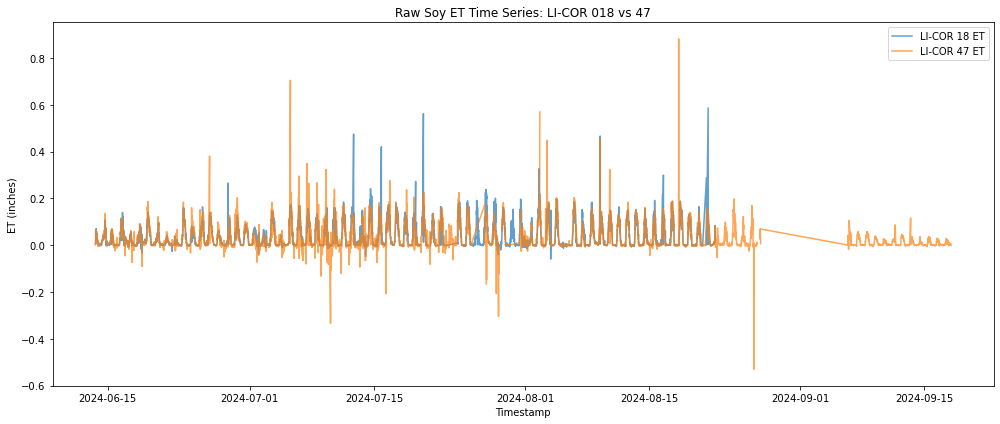

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
licor_file_018 = "Licor soy 018 not clean.csv"
licor_file_047 = "Licor soy 047 not clean.csv"

# Read the data
licor_df_018 = pd.read_csv(licor_file_018)
licor_df_047 = pd.read_csv(licor_file_047)

# Convert the 'time' column to datetime format
licor_df_018['time'] = pd.to_datetime(licor_df_018['time'])
licor_df_047['time'] = pd.to_datetime(licor_df_047['time'])

# Plot raw time series
plt.figure(figsize=(14, 6))
plt.plot(licor_df_018['time'], licor_df_018['ET.ET.1.3'], label='LI-COR 18 ET', alpha=0.7)
plt.plot(licor_df_047['time'], licor_df_047['ET.ET.1.3'], label='LI-COR 47 ET', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('ET (inches)')
plt.title('Raw Soy ET Time Series: LI-COR 018 vs 47')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

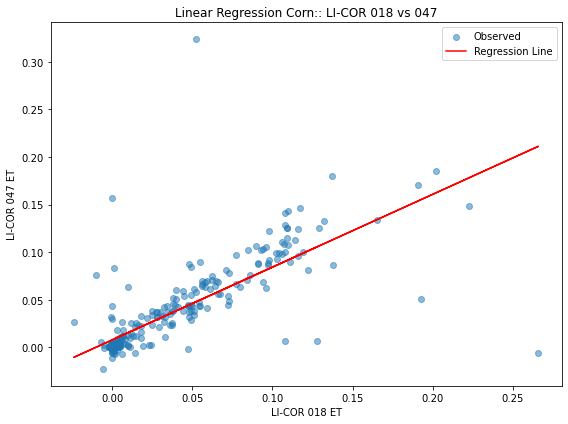

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the data
licor_df_018 = pd.read_csv("Licor soy 018 not clean.csv")
licor_df_047 = pd.read_csv("Licor soy 047 not clean.csv")

# Convert 'time' to datetime and round to the nearest minute
licor_df_018['time'] = pd.to_datetime(licor_df_018['time']).dt.round('1min')
licor_df_047['time'] = pd.to_datetime(licor_df_047['time']).dt.round('1min')

# Merge on rounded time
merged_df = pd.merge(licor_df_018[['time', 'ET.ET.1.3']], 
                     licor_df_047[['time', 'ET.ET.1.3']], 
                     on='time', 
                     suffixes=('_018', '_047'))

# Drop missing values
merged_df = merged_df.dropna(subset=['ET.ET.1.3_018', 'ET.ET.1.3_047'])

# Prepare regression variables
X = merged_df[['ET.ET.1.3_018']].values
y = merged_df['ET.ET.1.3_047'].values

# Fit regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.5, label='Observed')
plt.plot(X, y_pred, color='red',
         label=f'Regression Line')
plt.xlabel('LI-COR 018 ET')
plt.ylabel('LI-COR 047 ET')
plt.title('Linear Regression Corn:: LI-COR 018 vs 047')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()
